In [ ]:
!pip install opencv-contrib-python
!pip install cvlib
!pip install gtts  
!pip install playsound==1.2.2


7
The number of particles detect is 7


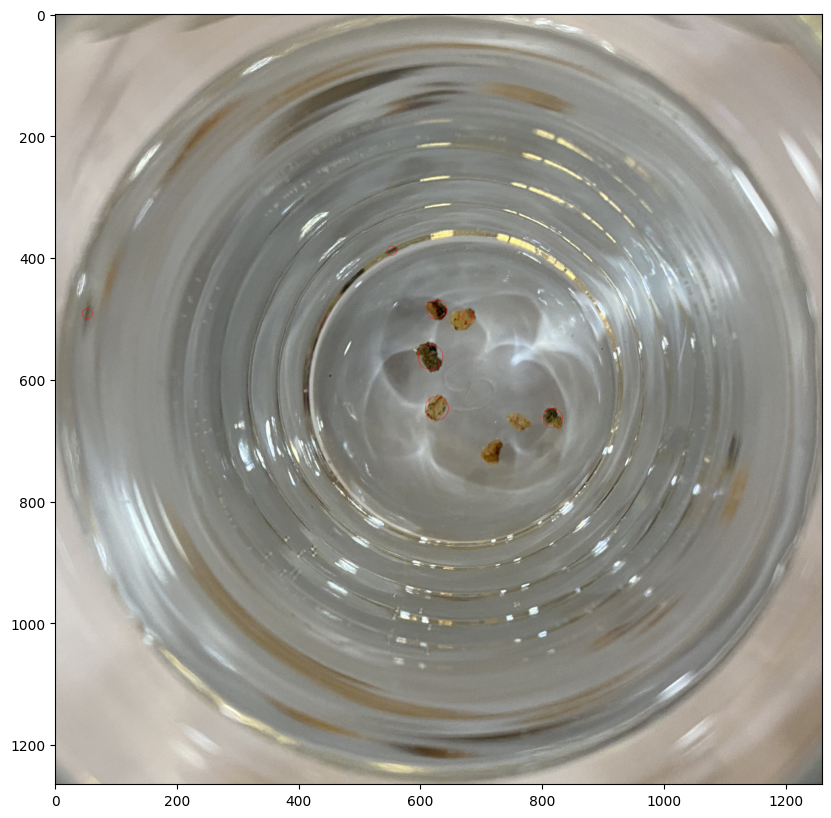

In [4]:
import matplotlib.pyplot as plt
import cv2
# import imutils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os.path

from gtts import gTTS
from playsound import playsound


fileref = "01_IMG_7587.jpg"
original = cv2.imread(fileref)
img = original
cv2.imwrite(os.path.join("inverse_"+fileref[:-4]+".png"), ~img)

img = cv2.medianBlur(img, 5)
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, th1 = cv2.threshold(img_grey, 130, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image',
          'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1]

cv2.imwrite(os.path.join("threshhold_"+fileref[:-4]+".jpg"), th1)
cv2.imwrite(os.path.join("adaptivthreshhold-m_"+fileref[:-4]+".jpg"), th2)
cv2.imwrite(os.path.join("adaptivthreshhold-g_"+fileref[:-4]+".jpg"), th3)

imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

imghsv[:, :, 2] = [[max(pixel - 25, 0) if pixel < 190 else min(pixel + 25, 255)
                    for pixel in row] for row in imghsv[:, :, 2]]

# cv2.imshow('contrast', cv2.cvtColor(imghsv, cv2.COLOR_HSV2BGR))
# plt.imshow(cv2.cvtColor(imghsv, cv2.COLOR_HSV2RGB))

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 150


# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.08  # 0.08
# Set edge gradient
params.thresholdStep = 0.5

# Filter by Area.
params.filterByArea = True
params.minArea = 300

# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(original)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(original, keypoints, np.array([]), (0, 0, 255),
                                     cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

particles_num = len(keypoints)
print(particles_num)

# speech
particles_text = f"The number of particles detect is {particles_num}"
print(particles_text)
language = "en"
tts = gTTS(text=particles_text,lang=language,slow=False)
sound_file = "output.mp3"

if os.path.exists(sound_file):
    os.remove(sound_file)

tts.save(sound_file)

playsound(sound_file, False)


# Show 
display = cv2.resize(im_with_keypoints, None, fx=0.5, fy=0.5)
cv2.imshow("Keypoints", display)

cv2.waitKey(0)
cv2.imwrite(os.path.join("keypoints_"+fileref[:-4]+".jpg"), im_with_keypoints)

display2 = cv2.cvtColor(display, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10,10))
plt.imshow(display2)
